## One Hot Encoding

In [1]:
import numpy as np
import pandas as pd

In [10]:
data=pd.read_csv('/home/manikanta/Downloads/mercedesbenz.csv',usecols=['X0','X1','X2','X3','X4','X5'])
data.head()

,X0,X1,X2,X3,X4,X5
0,k,v,at,a,d,u
1,k,t,av,e,d,y
2,az,w,n,c,d,x
3,az,t,n,f,d,x
4,az,v,n,f,d,h


In [13]:
for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')
    

X0 : 47 labels
X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels


In [14]:
pd.get_dummies(data,drop_first=True).shape

(4209, 152)

In [16]:
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [17]:
top_10=[x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [18]:
for label in top_10:
    data[label]=np.where(data['X2']==label,1,0)
    
data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [19]:
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [22]:
def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'-'+label]=np.where(data[variable]==label,1,0)
        
        
data=pd.read_csv("/home/manikanta/Downloads/mercedesbenz.csv",usecols=['X0','X1','X2','X3','X4','X5'])
one_hot_top_x(data,"X2",top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X2-as,X2-ae,X2-ai,X2-m,X2-ak,X2-r,X2-n,X2-s,X2-f,X2-e
0,k,v,at,a,d,u,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,0,0,0,0,0,0,1,0,0,0
4,az,v,n,f,d,h,0,0,0,0,0,0,1,0,0,0


In [24]:
top_10=[x for x in data.X1.value_counts().sort_values(ascending=False).head(0).index]
one_hot_top_x(data,'X1',top_10)
data.head()

,X0,X1,X2,X3,X4,X5,X2-as,X2-ae,X2-ai,X2-m,X2-ak,X2-r,X2-n,X2-s,X2-f,X2-e
0,k,v,at,a,d,u,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,0,0,0,0,0,0,1,0,0,0
4,az,v,n,f,d,h,0,0,0,0,0,0,1,0,0,0


### One hot Encoding

In [25]:
import numpy as np
import pandas as pd

In [26]:
data=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv")

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [30]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
df=pd.read_csv('/home/manikanta/Downloads/train_titanic.csv',usecols=['Sex'])

In [34]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [35]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [36]:
df1=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Embarked'])

In [37]:
df1.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [38]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
df1.dropna(inplace=True)

In [40]:
df1['Embarked'].uniqueque()

array(['S', 'C', 'Q'], dtype=object)

In [49]:
pd.get_dummies(df1,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [50]:
df1.shape

(889, 1)

###  Onehotencoding with many categories in a feature

In [56]:
df3=pd.read_csv("/home/manikanta/Downloads/mercedesbenz.csv",usecols=['X0','X1','X2','X3','X4','X5'])
df3.head()

,X0,X1,X2,X3,X4,X5
0,k,v,at,a,d,u
1,k,t,av,e,d,y
2,az,w,n,c,d,x
3,az,t,n,f,d,x
4,az,v,n,f,d,h


In [59]:
for i in df3.columns:
    print(len(df3[i].unique()))

47
27
44
7
4
29


In [60]:
df3.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [63]:
lst_10=df3.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [64]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [65]:
import numpy as np
for categories in lst_10:
    df3[categories]=np.where(df3['X1']==categories,1,0)
    

In [66]:
lst_10.append('X1')

In [67]:
df3[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


### Ordinal Number Encoding

In [68]:
import datetime

In [69]:
today_date=datetime.datetime.today()

In [70]:
today_date

datetime.datetime(2021, 8, 7, 21, 33, 10, 488832)

### list comprehesion

In [77]:
days=[today_date-datetime.timedelta(x) for x in range (0,15)]

In [81]:
data=pd.DataFrame(days,columns=['Day'])


In [82]:
data.head()

,Day
0,2021-08-07 21:33:10.488832
1,2021-08-06 21:33:10.488832
2,2021-08-05 21:33:10.488832
3,2021-08-04 21:33:10.488832
4,2021-08-03 21:33:10.488832


In [85]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2021-08-07 21:33:10.488832,Saturday
1,2021-08-06 21:33:10.488832,Friday
2,2021-08-05 21:33:10.488832,Thursday
3,2021-08-04 21:33:10.488832,Wednesday
4,2021-08-03 21:33:10.488832,Tuesday


In [91]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7
    
    
}

In [92]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [93]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [95]:
data.head(10)

,Day,weekday,weekday_ordinal
0,2021-08-07 21:33:10.488832,Saturday,6
1,2021-08-06 21:33:10.488832,Friday,5
2,2021-08-05 21:33:10.488832,Thursday,4
3,2021-08-04 21:33:10.488832,Wednesday,3
4,2021-08-03 21:33:10.488832,Tuesday,2
5,2021-08-02 21:33:10.488832,Monday,1
6,2021-08-01 21:33:10.488832,Sunday,7
7,2021-07-31 21:33:10.488832,Saturday,6
8,2021-07-30 21:33:10.488832,Friday,5
9,2021-07-29 21:33:10.488832,Thursday,4


### Count Or Frequency Encoding

In [103]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [104]:
columns=[1,3,5,6,7,8,9,13]

In [105]:
train_set=train_set[columns]

In [106]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [107]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [108]:
for feature in train_set.columns[:]:
    print(feature, ":", len(train_set[feature].unique()),'labels')
    

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [109]:
country_map=train_set['Country'].value_counts().to_dict()

In [110]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


Advantages¶
* Easy To Use
* Not increasing feature space ##### Disadvantages
* It will provide same weight if the frequencies are same

Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [111]:
pd=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Cabin','Survived'])
pd.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [112]:
pd['Cabin'].fillna('Missing',inplace=True)

In [113]:
pd['Cabin']=pd['Cabin'].astype(str).str[0]

In [114]:
pd.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [115]:
pd.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [118]:
pd.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [119]:
pd.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [121]:
ordinal_labels=pd.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [122]:
enumerate(ordinal_labels,0)

In [123]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [124]:
df['Cabin_ordinal_labels']=pd['Cabin'].map(ordinal_labels2)
df.head()

,Sex,Cabin_ordinal_labels
0,male,1
1,female,4
2,female,1
3,female,4
4,male,1


### Mean Encoding

In [125]:
mean_ordinal=pd.groupby(['Cabin'])['Survived'].mean().to_dict()

In [126]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [127]:
pd['mean_ordinal_encode']=pd['Cabin'].map(mean_ordinal)
pd.head()

,Survived,Cabin,mean_ordinal_encode
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


## cout or frequency encoding

In [30]:
import numpy as np
import pandas as pd

In [31]:
df=pd.read_csv("/home/manikanta/Downloads/mercedesbenz.csv",usecols=['X1','X2'])

In [32]:
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [33]:
df.shape

(4209, 2)

### One Hot Encoding

In [34]:
pd.get_dummies(df).shape

(4209, 71)

In [35]:
len(df['X1'].unique())

27

In [36]:
len(df['X2'].unique())

44

In [37]:
for col in df.columns[0:]:
    print(col,':',len(df[col].unique()),'labels')
    

X1 : 27 labels
X2 : 44 labels


##### lets obtains the counts each one of the labels in variable X2
#### lets capture this in a dictonary that we can use to re-map the labels

In [38]:
df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'h': 6,
 'at': 6,
 'q': 5,
 'al': 5,
 'an': 5,
 'av': 4,
 'p': 4,
 'ah': 4,
 'au': 3,
 'o': 1,
 'am': 1,
 'af': 1,
 'aa': 1,
 'c': 1,
 'j': 1,
 'ar': 1,
 'l': 1}

In [39]:
df_frequency_map=df.X2.value_counts().to_dict()

In [40]:
df.X2=df.X2.map(df_frequency_map)
df.head(10)

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137
5,b,81
6,r,81
7,l,1659
8,s,1659
9,b,63


### Missing Values- Feature Engineering- Day 1
Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

What are the different types of Missing Data?
1. ### Missing Completely at Random, MCAR: 
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [41]:
import numpy as np
import pandas as pd

In [42]:
df=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv")

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.shape

(891, 12)

In [45]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [50]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [51]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [59]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [62]:
df['cabin_null'].unique()

array([1, 0])

In [65]:
df.groupby(['Survived'])['cabin_null'].mean() # 0 means survived and 1 means not survived

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

3. Missing At Random(MAR)

Men---hide their salary
Women---hide their age

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

###### Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [67]:
df=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Age','Fare','Survived'])

In [68]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [69]:
df.shape

(891, 3)

In [70]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [71]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [72]:
def input_name(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [73]:
median=df.Age.median()
median

28.0

In [75]:
input_name(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [76]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

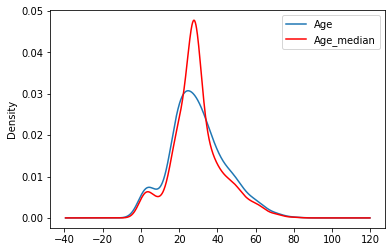

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation
##### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset 
##### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

## Day-2
### Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [80]:
import pandas as pd
import numpy as np


In [81]:
df=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [82]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [83]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [84]:
df['Age'].isnull().sum()

177

##  NAN value fill with some random value

In [87]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [90]:
df[df['Age'].isnull()].index ## NAN position values

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [91]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
      ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [98]:
median=df.Age.median()

In [99]:
median

28.0

In [100]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


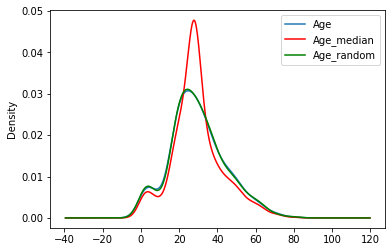

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy To implement
2. There is less distortion in variance
### Disadvantage
1. Every situation randomness wont work

###### Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [108]:
df=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [109]:
df['Age_Nan']=np.where(df['Age'].isnull(),1,0) # 0-Age value present, 1- NAN

In [110]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [111]:
df.head(20)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [112]:
df.Age.median()

28.0

In [113]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [114]:
df.head(30)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values
#### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

### End of Distribution imputation

In [115]:
df=pd.read_csv('/home/manikanta/Downloads/train_titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

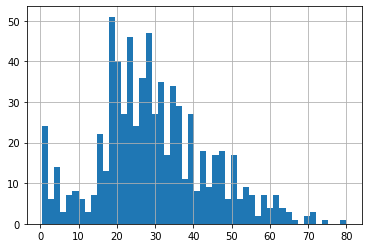

In [117]:
df.Age.hist(bins=50)

In [120]:
extreme=df.Age.mean()+3*df.Age.std()

In [121]:
extreme

73.27860964406094

<AxesSubplot:xlabel='Age'>

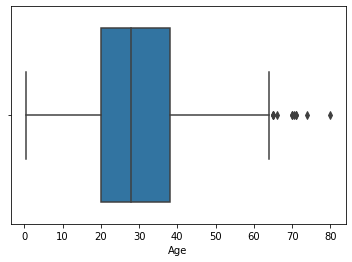

In [122]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [127]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [128]:
impute_nan(df,'Age',df.Age.median(),extreme)

<AxesSubplot:>

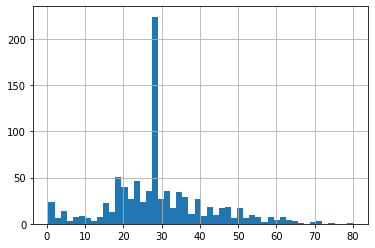

In [129]:
df['Age'].hist(bins=50)

<AxesSubplot:>

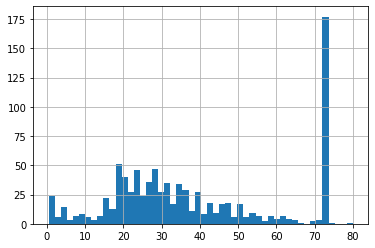

In [130]:
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

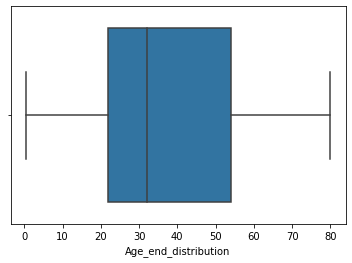

In [131]:
sns.boxplot('Age_end_distribution',data=df)

## Day-3
### Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [132]:
df=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Age','Fare','Survived'])

In [133]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [134]:
def impute_nan(df,variable):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+'_hundrad']=df[variable].fillna(100)

In [135]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

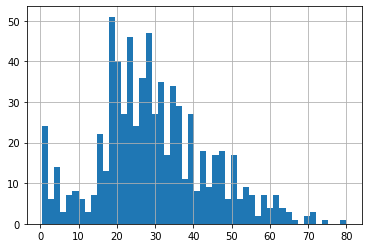

In [137]:
df.Age.hist(bins=50)

### Advantages
* Easy to implement
* Captures the importance of missingess if there is one
### Disadvantages
* Distorts the original distribution of the variable
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
* Hard to decide which value to use

#### How To Handle Categroical Missing Values
##### Frequent Category Imputation

In [141]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [150]:
df=pd.read_csv("/home/manikanta/Downloads/train_house_price.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [151]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [152]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [153]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [154]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [155]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [156]:
df.isna().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [157]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

### Compute the frequency with every feature

In [159]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

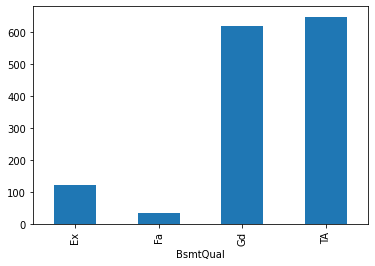

In [161]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

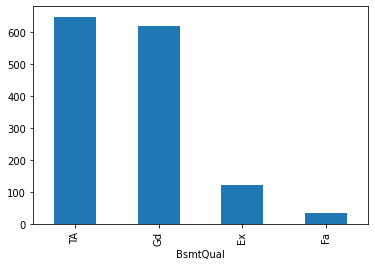

In [163]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

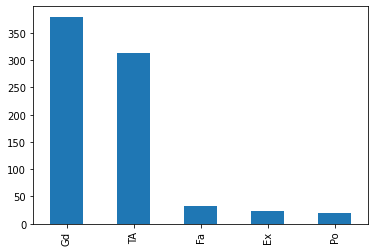

In [166]:
df['FireplaceQu'].value_counts().plot.bar()

<AxesSubplot:>

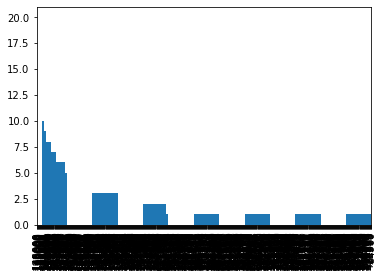

In [167]:
df['SalePrice'].value_counts().plot.bar()

<AxesSubplot:>

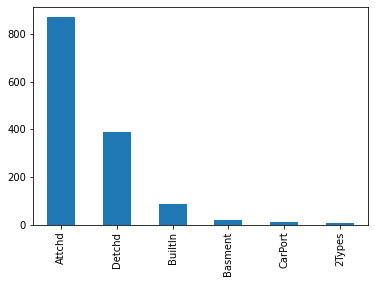

In [168]:
df['GarageType'].value_counts().plot.bar()

In [169]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [170]:
def impute_nan(df,variable):
    most_freq_catrgory=df[variable].value_counts().index[0]
    df[variable].fillna(most_freq_catrgory,inplace=True)

In [172]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [173]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [174]:
df.isna().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [175]:
df.isna().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages
1. Easy To implement
2. Fater way to implement 
### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

#### Adding a variable to capture NAN

In [176]:
df=pd.read_csv("/home/manikanta/Downloads/train_house_price.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [177]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [186]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [187]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [188]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [190]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [191]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [205]:
df=pd.read_csv("/home/manikanta/Downloads/train_house_price.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [206]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [207]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [208]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [209]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)


#### Probability Ratio Encoding
1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical feature

In [261]:
df=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [262]:
df.isna().sum()

Survived      0
Cabin       687
dtype: int64

In [263]:
### Replace NAN with  Missing
df['Cabin'].fillna('Missing',inplace=True)

In [264]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [265]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [266]:
df['Cabin'].value_counts()

Missing        687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
D50              1
F38              1
E38              1
E40              1
C99              1
Name: Cabin, Length: 148, dtype: int64

In [267]:
df['Cabin']=df['Cabin'].astype(str).str[0] ## it display the first letter of the word
df.head(10)

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
5,0,M
6,0,E
7,0,M
8,1,M
9,1,M


In [268]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [269]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [270]:
## Survived the people in Particular Cabin
prob_df=pd.DataFrame(prob_df)
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [271]:
prob_df['Died']=1-prob_df['Survived']

In [272]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [273]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [276]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [279]:
df['cabin_encoded']=df['Cabin'].map(probability_encoded)

In [280]:
df.head()

,Survived,Cabin,cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


## Transformation of Features
Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance
Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

0-255 pixels

### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation

### Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [281]:
df1=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv",usecols=['Pclass','Age','Fare','Survived'])
df1.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [282]:
df1.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [286]:
df1['Age'].fillna(df1.Age.median(),inplace=True)

In [287]:
df1.isna().mean()

Survived    0.0
Pclass      0.0
Age         0.0
Fare        0.0
dtype: float64

In [288]:
df1.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [289]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler


In [290]:
scaler=StandardScaler()
df_scaler=scaler.fit_transform(df1)

In [292]:
pd.DataFrame(df_scaler)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [293]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.51823724, -1.47036756, -1.42249788, -1.37462819,
        -1.32675851, -1.27888883, -1.23101914, -1.18314946, -1.13527978,
        -1.08741009, -1.03954041, -0.99167073, -0.94380104, -0.89593136,
        -0.84806167, -0.80019199, -0.75232231, -0.70445262, -0.65658294,
        -0.60871326, -0.56084357, -0.51297389, -0.46510421, -0.41723452,
        -0.36936484, -0.32149516, -0.27362547, -0.22575579, -0.17788611,
        -0.13001642, -0.08214674, -0.03427706,  0.01359263,  0.06146231,
         0.10933199,  0.15720168,  0.20507136,  0.25294104,  0.30081073,
         0.34868041,  0.39655009,  0.44441978,  0.49228946,  0.54015914,
 

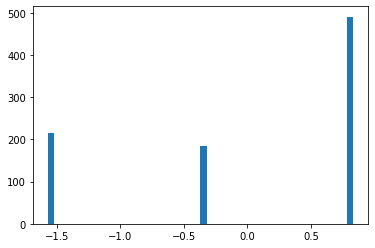

In [295]:
plt.hist(df_scaler[:,1],bins=50)

(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36., 224.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3.,   0.,   1.,   0.,   0.,   1.]),
 array([-2.22415608, -2.10184187, -1.97952766, -1.85721345, -1.73489924,
        -1.61258503, -1.49027082, -1.36795661, -1.24564239, -1.12332818,
        -1.00101397, -0.87869976, -0.75638555, -0.63407134, -0.51175713,
        -0.38944292, -0.26712871, -0.1448145 , -0.02250029,  0.09981392,
         0.22212813,  0.34444234,  0.46675655,  0.58907076,  0.71138498,
         0.83369919,  0.9560134 ,  1.07832761,  1.20064182,  1.32295603,
         1.44527024,  1.56758445,  1.68989866,  1.81221287,  1.93452708,
         2.05684129,  2.1791555 ,  2.30146971,  2.42378392,  2.54609813,
         2.66841235,  2.79072656,  2.91304077,  3.03535498,  3.15766919,
 

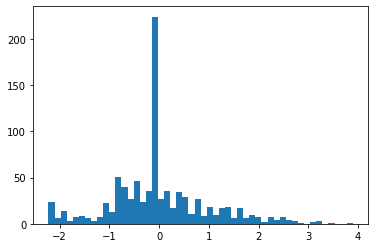

In [297]:
plt.hist(df_scaler[:,2],bins=50)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

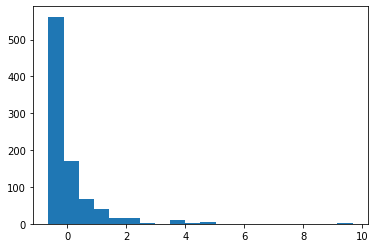

In [298]:
plt.hist(df_scaler[:,3],bins=20)

### Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [299]:
from sklearn.preprocessing import MinMaxScaler

In [300]:
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df1),columns=df1.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

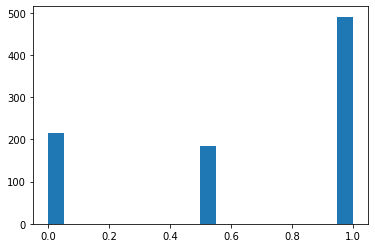

In [301]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

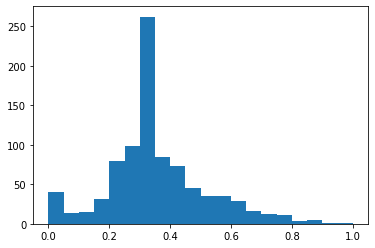

In [302]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

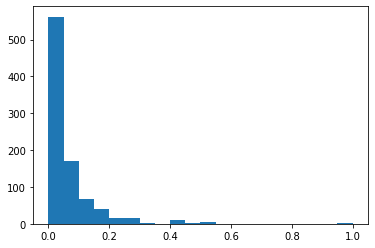

In [303]:
plt.hist(df_minmax['Fare'],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

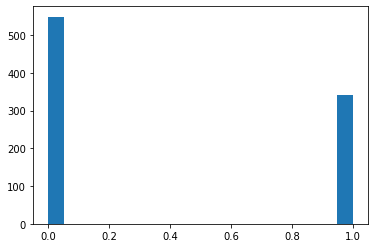

In [304]:
plt.hist(df_minmax['Survived'],bins=20)

### Robust Scaler
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [305]:
from sklearn.preprocessing import RobustScaler
robu=RobustScaler()
robus_scaler=pd.DataFrame(robu.fit_transform(df1),columns=df1.columns)
robus_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

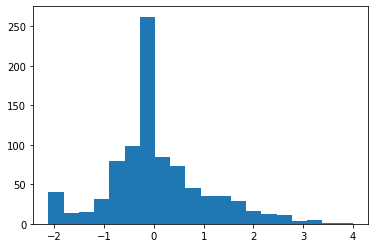

In [306]:
plt.hist(robus_scaler['Age'],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

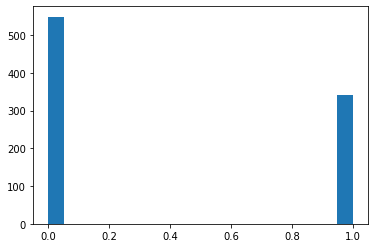

In [307]:
plt.hist(robus_scaler['Survived'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

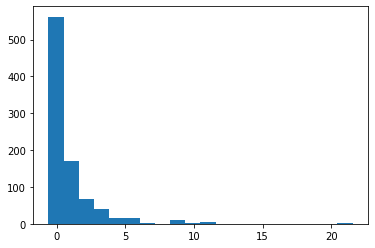

In [308]:
plt.hist(robus_scaler['Fare'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

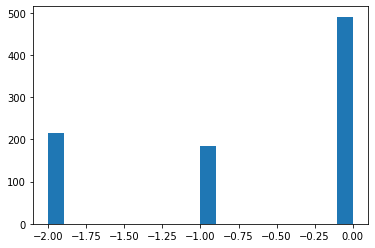

In [309]:
plt.hist(robus_scaler['Pclass'],bins=20)

#### Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

* logarithmic transformation
* reciprocal transformation
* square root transformation
* exponential transformation (more general, you can use any exponent)
* boxcox transformation

In [317]:
df2=pd.read_csv('/home/manikanta/Downloads/train_titanic.csv',usecols=['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [318]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [319]:
df2['Age']=df2['Age'].fillna(df2['Age'].median())

In [320]:
df2.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [321]:
import scipy.stats as stat
import pylab

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

In [323]:
def plot_data(df2,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df2[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df2[feature],dist='norm',plot=pylab)
    plt.show()

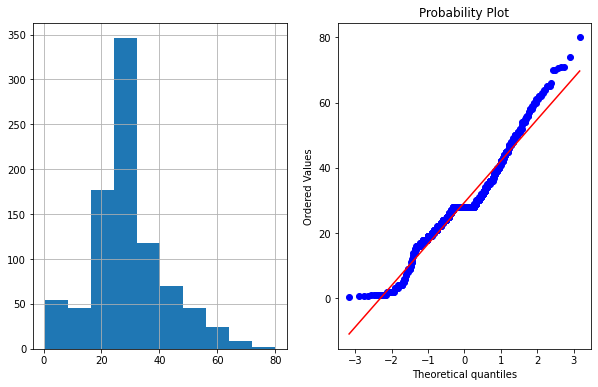

In [325]:
plot_data(df2,'Age')

### Logarithmic Transformation

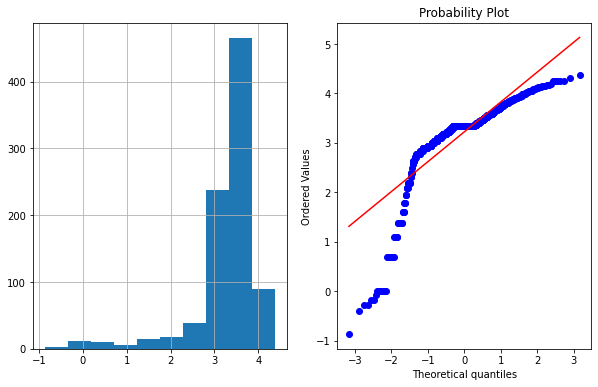

In [327]:
import numpy as np
df2['Age_log']=np.log(df2['Age'])
plot_data(df2,'Age_log')

### Reciprocal Trnasformation

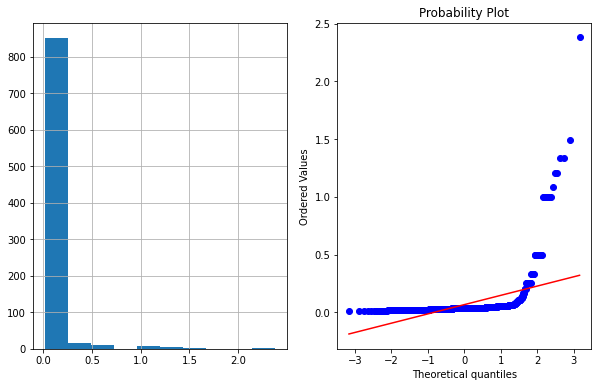

In [329]:
df2['Age_reciprocal']=1/df2.Age
plot_data(df2,'Age_reciprocal')

##### Square Root Transformation

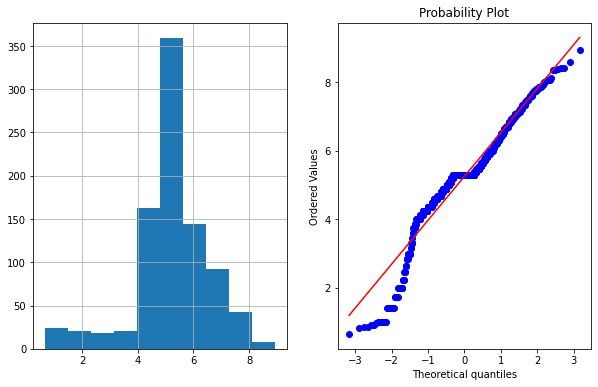

In [330]:

df2['Age_sqaure']=df2.Age**(1/2)
plot_data(df2,'Age_sqaure')

#### Exponential Transdormation

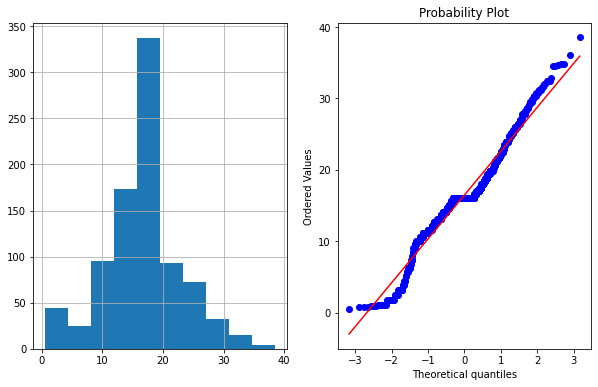

In [331]:
df2['Age_exponential']=df2.Age**(1/1.2)
plot_data(df2,'Age_exponential')

### BoxCOx Transformation¶
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [332]:
df2['Age_Boxcox'],parameters=stat.boxcox(df2['Age'])

In [333]:

print(parameters)

0.7964531473656952


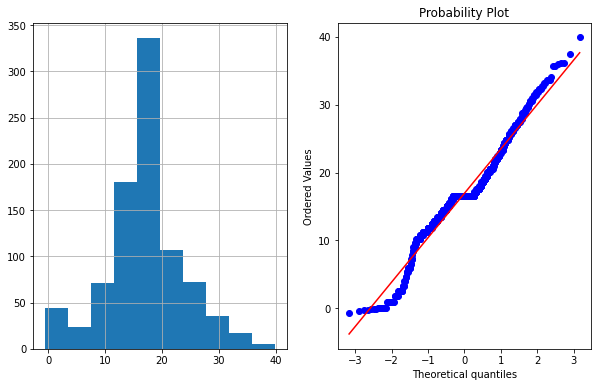

In [334]:
plot_data(df2,'Age_Boxcox')

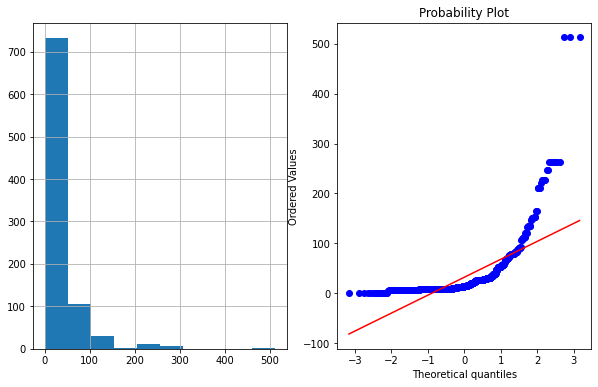

In [335]:
plot_data(df2,'Fare')

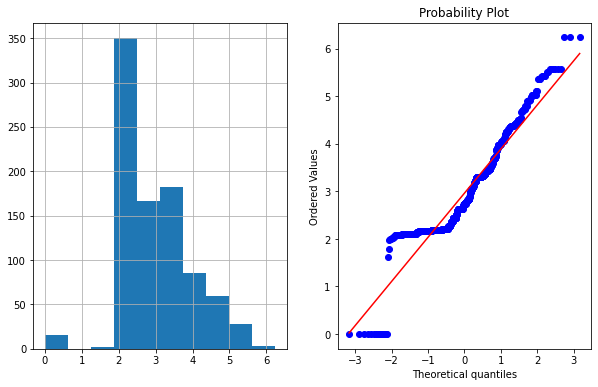

In [336]:
#### Fare
df2['Fare_log']=np.log1p(df2['Fare'])
plot_data(df2,'Fare_log')

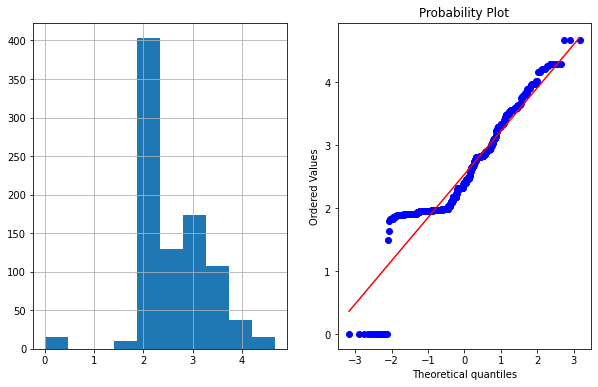

In [337]:
df2['Fare_Boxcox'],parameters=stat.boxcox(df2['Fare']+1)
plot_data(df2,'Fare_Boxcox')

### Handle-Imbalance-Dataset

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("/home/manikanta/Desktop/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
x=data.drop(['Class'],axis=1)
y=data['Class']

In [8]:
x.shape

(284807, 30)

In [9]:
y.shape

(284807,)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [12]:
from sklearn.model_selection import KFold,GridSearchCV

In [13]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [19]:
log_class=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [22]:
print(log_class.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [23]:
clf=GridSearchCV(log_class,grid,cv=cv)
clf.fit(x_train,y_train)

/home/manikanta/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/manikanta/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs f

/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/manikanta/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']})

In [24]:
y_pred=clf.predict(x_test)

In [35]:
y_pred.shape

(85443,)

In [36]:
x_test.shape

(85443, 30)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn
print(sklearn.metrics.accuracy_score(y_test,y_pred))

0.9989115550718023


In [40]:
print(sklearn.metrics.confusion_matrix(y_test,y_pred))

[[85243    47]
 [   46   107]]


In [41]:
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.69      0.70      0.70       153

    accuracy                           1.00     85443
   macro avg       0.85      0.85      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [42]:
### increace the class weight
class_weight=dict({0:1,1:100})

In [43]:
from  sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [44]:
y_pred_rf=classifier.predict(x_test)
print(sklearn.metrics.accuracy_score(y_test,y_pred_rf))


0.9994499256814484


In [45]:
print(sklearn.metrics.confusion_matrix(y_test,y_pred_rf))

[[85283     7]
 [   40   113]]


In [46]:
print(sklearn.metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.94      0.74      0.83       153

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### under sampling

unser sample reduce the points of maximum label 

In [48]:
from collections import Counter
Counter(y_train)

Counter({0: 199025, 1: 339})

### Discussion Related With Outliers And Impact On Machine Learning!!¶
###### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

In [57]:
df=pd.read_csv("/home/manikanta/Downloads/train_titanic.csv")

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age'>

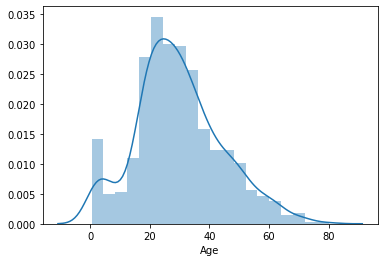

In [61]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

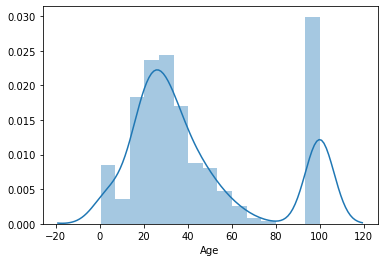

In [63]:
sns.distplot(df['Age'].fillna(100))

## Gaussian Distribution

Text(0, 0.5, 'No of passenger')

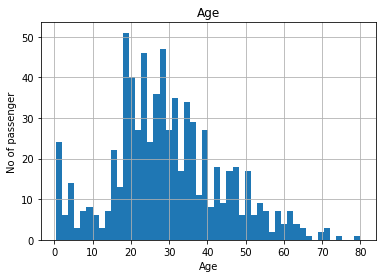

In [64]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')


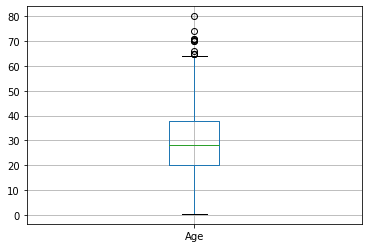

In [65]:
figure=df.boxplot('Age')

In [66]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### If The Data Is Normally Distributed We use this

In [67]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

#### if Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No.of passangers')

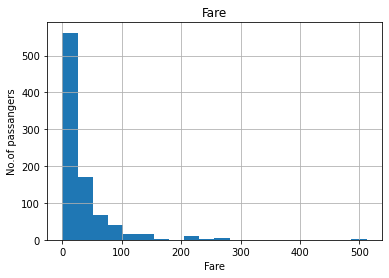

In [76]:
figure=df.Fare.hist(bins=20)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No.of passangers')


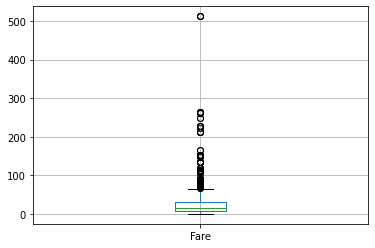

In [77]:
figure=df.boxplot(column='Fare')

In [78]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [81]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [83]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [84]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [85]:
data=df.copy()

In [86]:
data.loc[data['Age']>=73,'Age']=73

In [87]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

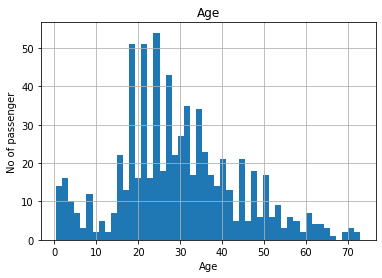

In [92]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

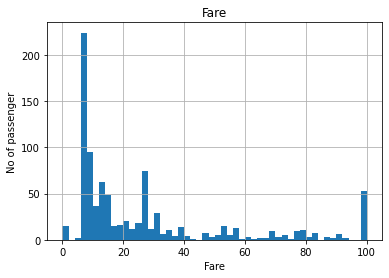

In [93]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 2)
(268, 2)
(623,)
(268,)


In [96]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

In [102]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6417910447761194
roc_auc_score: 0.6677475898334794


In [103]:
from sklearn.metrics import classification_report
print("Classificarion_report: {}".format(classification_report(y_test,y_pred)))

Classificarion_report:               precision    recall  f1-score   support

           0       0.65      0.91      0.76       163
           1       0.62      0.22      0.32       105

    accuracy                           0.64       268
   macro avg       0.63      0.57      0.54       268
weighted avg       0.64      0.64      0.59       268

